# Understanding Soil Temperature

Soil temperature is an essential variable for the decision-making of agricultural operations (e.g. planting date, seeding depth, fertilizer application), construction (e.g. burial depth of pipes and cables), biology of underground insects and behaviour of poikilothermic animals, and climate modeling.

Unlike other soil variables, like soil moisture, soil temperature exhibits consistent and highly predictable patterns. In this exercise we will explore a dataset of hourly soil temperature for the city of Fargo, ND collected at 14 different soil depths from 5 to 225 cm depth. the dataset goes from October-2014 to October-2018. Longer timeseries are usually required for scientific studies, but this dataset will be sufficient to capture the major oscillation patterns in soil temperature.


In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load soil temperature data
df = pd.read_csv("../datasets/fargo_hourly_deep_soil_temperature.csv")
df.head(5)


,station,time_cst,T5cm,T10cm,T20cm,T30cm,T40cm,T50cm,T60cm,T80cm,T100cm,T125cm,T150cm,T175cm,T200cm,T225cm
0,Fargo,10/2/14 12:00,18.09,15.36,14.49,14.64,14.71,14.68,14.60,14.28,13.96,13.43,12.92,12.37,11.66,11.16
1,Fargo,10/2/14 13:00,18.96,16.08,14.70,14.66,14.72,14.68,14.60,14.25,13.92,13.38,12.86,12.30,11.66,11.15
2,Fargo,10/2/14 14:00,18.59,16.45,14.89,14.70,14.72,14.65,14.56,14.20,13.85,13.30,12.78,12.22,11.65,11.10
3,Fargo,10/2/14 15:00,19.82,17.01,15.10,14.73,14.71,14.65,14.54,14.18,13.80,13.26,12.71,12.12,11.65,11.13
4,Fargo,10/2/14 16:00,19.09,17.14,15.24,14.74,14.68,14.59,14.49,14.10,13.73,13.14,12.60,11.97,11.64,11.08


In [3]:
# Convert dates from string to Pandas datetime format
df["time_cst"] = pd.to_datetime(df["time_cst"])
df.head(5)


,station,time_cst,T5cm,T10cm,T20cm,T30cm,T40cm,T50cm,T60cm,T80cm,T100cm,T125cm,T150cm,T175cm,T200cm,T225cm
0,Fargo,2014-10-02 12:00:00,18.09,15.36,14.49,14.64,14.71,14.68,14.60,14.28,13.96,13.43,12.92,12.37,11.66,11.16
1,Fargo,2014-10-02 13:00:00,18.96,16.08,14.70,14.66,14.72,14.68,14.60,14.25,13.92,13.38,12.86,12.30,11.66,11.15
2,Fargo,2014-10-02 14:00:00,18.59,16.45,14.89,14.70,14.72,14.65,14.56,14.20,13.85,13.30,12.78,12.22,11.65,11.10
3,Fargo,2014-10-02 15:00:00,19.82,17.01,15.10,14.73,14.71,14.65,14.54,14.18,13.80,13.26,12.71,12.12,11.65,11.13
4,Fargo,2014-10-02 16:00:00,19.09,17.14,15.24,14.74,14.68,14.59,14.49,14.10,13.73,13.14,12.60,11.97,11.64,11.08


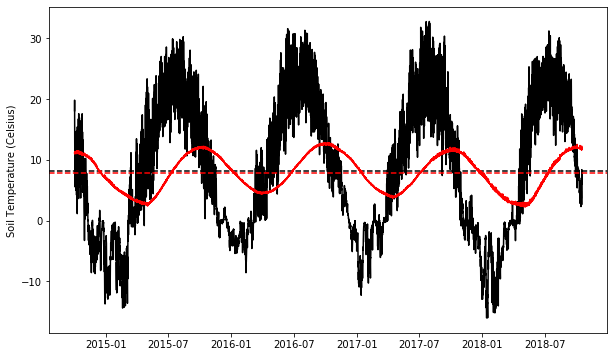

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df["time_cst"], df["T5cm"], "-k", label="5cm")
plt.axhline(df["T5cm"].mean(), linestyle="--", color="k")
plt.plot(df["time_cst"], df["T225cm"], "-r", label="225")
plt.axhline(df["T225cm"].mean(), linestyle="--", color="r")
plt.ylabel('Soil Temperature (Celsius)')
plt.show()


In [5]:
# Get depths for plotting purposes
depths = [float(col[1:-2]) for col in df.columns[2:]]
depths = np.transpose(depths)


In [17]:
# Compute mean and amplitude for each soil depth
means = []
amplitudes = []
doymax = []
doymin = []
window = 15

for depth in df.columns[2:]:
    # Mean
    means.append(df[depth].mean())
    
    # Amplitude
    Tmax = df[depth].rolling(window=window, center=True).max().max() # Max of rolling max.
    Tmin = df[depth].rolling(window=window, center=True).min().min() # Min of rolling min.
    A = (Tmax-Tmin)/2
    amplitudes.append(A)
    
    # Time of maximum temperature
    rowmax = df[depth].rolling(window=window, center=True).max().idxmax()
    doymax.append(df.loc[rowmax,"time_cst"].dayofyear)
    
    # Time of minumum temperature
    rowmin = df[depth].rolling(window=window, center=True).min().idxmin()
    doymin.append(df.loc[rowmin,"time_cst"].dayofyear)
    

In [16]:
# The previous step can be done using two different approaches using Pandas and Numpy.
# I chose the Pandas approach to chain built-in methods and improve code readability
df["T5cm"].rolling(window=window, center=True).min().idxmin()
np.argmin(df["T5cm"].rolling(window=window, center=True).min())


28766

## Mean annual temperature for each depth

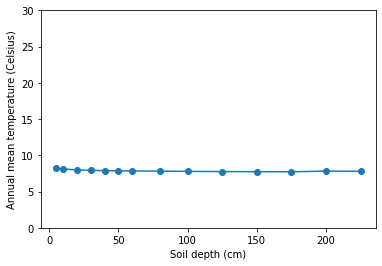

In [18]:
# Plot means
plt.plot(depths,means,'o-')
plt.xlabel("Soil depth (cm)")
plt.ylabel("Annual mean temperature (Celsius)")
plt.ylim(0,30)
plt.show()

In [19]:
print("All annual temperatures are within:", round(np.max(means)-np.min(means),2) )


All annual temperatures are within: 0.5


Although not identical, the annual mean temperature for all soil layers from 5 cm to 225 cm depth are remarkably similar, and they are all within half a degree Celsius! This means that by knowing the average annual temperature at the soil surface we also know the soil temperature at all other layers. Not just that, we can also approximate the temperature of the water in well or water table. 

Our findings also support the assumption of the analytical solution of the heat conduction-diffusion equation that assumes that the average soil temperature at all depths is the same and that at "infinitely" deep soil layers the temperature approaches the mean annual temperature.


## Annual amplitude for each depth

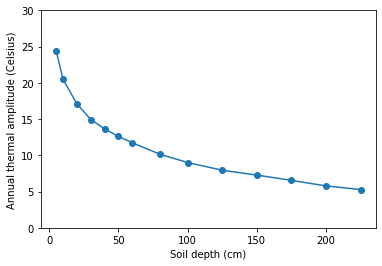

In [20]:
# Plot amplitudes
plt.plot(depths,amplitudes,'o-')
plt.xlabel("Soil depth (cm)")
plt.ylabel("Annual thermal amplitude (Celsius)")
plt.ylim(0,30)
plt.show()


Unlike the mean annual temperature, the annual amplitude decreases exponentially as a function of soil depth. This is somewhat expected since layers closer to the soil surface are exposed to environmental fluctuations that cause heating and cooling of the soil. Deeper soil layers are somewhat insulated from these fluctuations by the preceding soil layers.

## Occurrence of maximum and minimum temperature for each depth

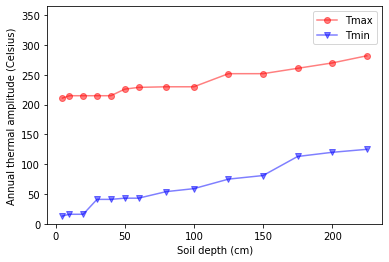

In [21]:
# Plot occurrence of maximum temperature
plt.plot(depths,doymax,'o-r', label="Tmax", alpha=0.5)
plt.plot(depths,doymin,'v-b', label="Tmin", alpha=0.5)
plt.xlabel("Soil depth (cm)")
plt.ylabel("Annual thermal amplitude (Celsius)")
plt.ylim(0,365)
plt.legend()
plt.show()


The occurrence of maximum and minimum annual temperatures exhibit a similar trend: Deeper layers experience a delayed occurrence of maximum and minimum temperatures compared to layers closer to the soil surface.

The coolest soil temperature at 225 cm depth occurs in the month of May, while the warmest soil temperature for the same layer occurs in October. At the soil surface, the minimum and maximum soil temperatures occur during January and July, as expected.


## Contour plot dynamics

A contour plot will allow us to synthesize the temporal changes in soil temprature as a function of depth in a single plot. We will reduce the dataset to daily averages to reduce the number of points we pass to the contour plot function, otherwise it would take too long on a regular laptop or desktop. 

In [34]:
df_daily = df.groupby(df["time_cst"].dt.date).mean()
df_daily.head()


,T5cm,T10cm,T20cm,T30cm,T40cm,T50cm,T60cm,T80cm,T100cm,T125cm,T150cm,T175cm,T200cm,T225cm
time_cst,,,,,,,,,,,,,,
2014-10-02,16.137500,15.681667,15.006667,14.746667,14.672500,14.585833,14.476667,14.137500,13.759167,13.209167,12.685000,12.135000,11.634167,11.072500
2014-10-03,9.898792,11.684583,13.440000,14.202083,14.450000,14.456667,14.384167,14.143750,13.787500,13.267500,12.748333,12.210417,11.688750,11.134583
2014-10-04,8.322625,9.880833,11.760000,12.974583,13.666250,13.978750,14.111250,14.054167,13.752500,13.260000,12.754583,12.217500,11.707083,11.155417
2014-10-05,8.636125,9.656250,11.123333,12.224167,12.961250,13.394167,13.680833,13.827917,13.637917,13.198750,12.711250,12.178750,11.702083,11.160417
2014-10-06,8.801125,9.616667,10.785000,11.742917,12.453333,12.922917,13.280833,13.577083,13.508750,13.156250,12.707083,12.195833,11.702083,11.162500


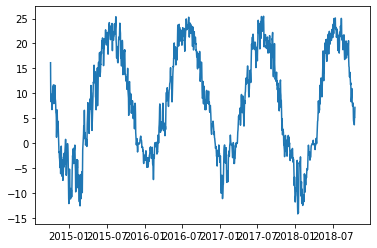

In [106]:
# Check that our daily computations make sense
plt.plot(df_daily["T5cm"])
plt.show()


In [111]:
days = (df_daily.index - df_daily.index[0]).days
x = np.repeat(days.values,14)
print(x.shape)
x

(20678,)


array([   0,    0,    0, ..., 1476, 1476, 1476])

In [115]:
y = np.tile(depths*-1,df_daily.shape[0])
print(y.shape)
y

(20678,)


array([  -5.,  -10.,  -20., ..., -175., -200., -225.])

In [113]:
z = df_daily.values.flatten()
print(z.shape)
z

(20678,)


array([16.1375    , 15.68166667, 15.00666667, ..., 12.096     ,
       12.001     , 11.788     ])

In [132]:
days[[0:-1:10]].values

array([1, 3])

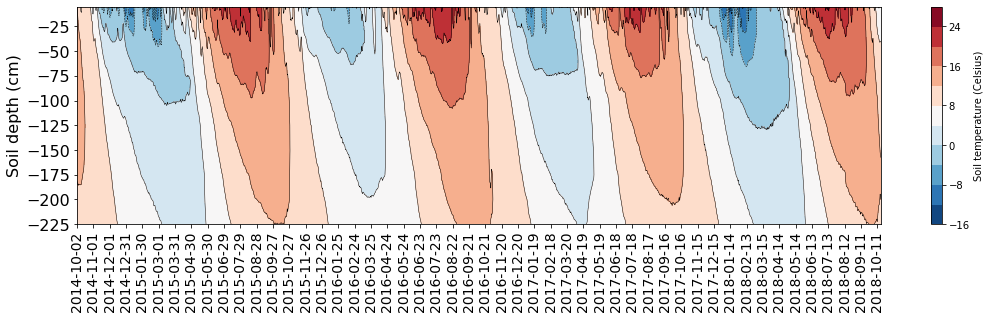

In [137]:
plt.figure(figsize=(18,4))
plt.tricontour(x, y, z, levels=10, linewidths=0.5, colors='k')
plt.tricontourf(x, y, z, levels=10, cmap="RdBu_r")
plt.xticks(days[0:-1:30].values, labels=df_daily.index[0:-1:30], rotation=90)
plt.xticks(fontsize=14)
plt.colorbar(label="Soil temperature (Celsius)")
plt.ylabel('Soil depth (cm)', size=16)
plt.yticks(fontsize=16)
plt.show()

## References

North Dakota Agricultural Weather Network. Deep soil temperature data retrieved on October 2018. Link: https://ndawn.ndsu.nodak.edu/deep-soil-temperatures.html

Akyüz, F., Ewens, M., Carcoana, R. and Mullins, B., 2008. NWS Frost depth observation with liquid-in probes performance: Two-year review. Journal of Service Climatology, 2(2), pp.1-10.